<center> <img src="https://d3i71xaburhd42.cloudfront.net/261c3e30bae8b8bdc83541ffa9331b52fcf015e6/3-Figure2-1.png" width=20% > </center>

# <center> Assignment 1: Photometric Stereo & Colour </center>
<center> Computer Vision 1 University of Amsterdam </center>
<center> Due 23:59PM, September 16, 2023 (Amsterdam time) </center>
<center> <b>TA's: Ozzy Ülger, Egoitz Gonzalez, Sina Taslimi</b></center>
    
***

Student1 ID: 12635693 \
Student1 Name: Leon Peric

Student2 ID: 15216608 \
Student2 Name: Despoina Touska

Student3 ID: 12652954 \
Student3 Name: Ekin Fergan

Student4 ID: 12600881 \
Student4 Name: Camille Niessink


# General guidelines


Your code and discussion must be handed in this jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Lab 1 Assignment. Please also fill out your names and ID's above.

For full credit, make sure your notebook follows these guidelines:
- It is mandatory to use the Python environment provided with the assignment; the environment specifies the package versions that have to be used to prevent the use of particular functions. Using different packages versions may lead to grade deduction. In the 'Environment Setup' below you can check whether your environment is set up correctly.
- To install the environment with the right package versions, use the following command in your terminal: ```python
conda env create --file=environment.yaml```, then activate the environment using the command ```python conda activate cv1```.
- Please express your thoughts concisely. The number of words does not necessarily correlate with how well you understand the concepts.
- Answer all given questions and sub-questions.
- Try to understand the problem as much as you can. When answering a question, give evidences (qualitative and/or quantitative results, references to papers, figures etc.) to support your arguments. Note that not everything might be explicitly asked for and you are expected to think about what might strengthen you arguments and make the notebook self-contained and complete.
- Tables and figures must be accompanied by a brief description. Do not forget to add a number, a title, and if applicable name and unit of variables in a table, name and unit of axes and legends in a figure.

__Note:__ A more complete overview of the lab requirements can be found in the Course Manual on Canvas

Late submissions are not allowed. Assignments that are submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance, to avoid last minute system failure issues.
Plagiarism note: Keep in mind that plagiarism (submitted materials which are not your work) is a serious crime and any misconduct shall be punished with the university regulations. This includes the use of generative tools such as ChatGPT.

**ENSURE THAT YOU SAVE ALL RESULTS / ANSWERS ON THE QUESTIONS (EVEN IF YOU RE-USE SOME CODE).**

# 0 Environment Setup

In [1]:
# environment and libraries
import os
import glob
import numpy as np
import random
import cv2
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D   # necessary in part 4.

In [2]:
# Make sure you're using the provided environment!
assert cv2.__version__ == "3.4.8", "You're not using the provided Python environment!"
assert np.__version__ == "1.19.5", "You're not using the provided Python environment!"
assert matplotlib.__version__ == "3.3.4", "You're not using the provided Python environment!"
# Proceed to the next cell if you don't get any error.

# 1 Colour Spaces *(13 pts)*

In this part of the assignment, you will study the different colour spaces for image representations and experiment how to convert a given RGB image to a specific colour space

### 1.1 RGB Colour Model (2 pts)

Why do we use a RGB colour model as the basis of our digital cameras and photography? How does a standard digital camera capture the full RGB colour image?


The existence of three primary colours (RGB colour model) is a result of the tri-stimulus (or trichromatic) nature of the human visual system since we have three different kinds of cells called cones, each of which responds selectively to a different portion of the colour spectrum.

The digital camera captures an RGB colour image using sensors such as charge-coupled device (CCD) and complementary metal oxide on silicon (CMOS). Analytically, the light passes through the image sensor after being emitted by one or more light sources, reflecting off one or more surfaces, and passing through the camera's optics (lenses). Typically, light falling on an imaging sensor (CCD, CMOS) is picked up by an active sensing area, integrated for the duration of the exposure, and then passed to a set of sense amplifiers.
Furthermore, most of today’s digital cameras use a colour filter array (CFA), where alternating sensors are covered by different coloured filters. The most commonly used pattern in color cameras today is the Bayer pattern, which places green filters over half of the sensors (in a checkerboard pattern), and red and blue filters over the remaining ones. In doing so, this filter array is applied to a single image sensor in order to enable it to produce R, G, and B samples.

(Computer Vision: Algorithms and Applications 2nd Edition, Richard Szeliski)

### 1.2 Colour Space Conversion *(8 pts)*




Create a function to convert an RGB image into the following colour spaces by using the template code you are provided ConvertColourSpace() below and other sub-functions. Visualize the new image and its channels separately in the same figure. That is, for example, in the case of HSV colour space, you need to visualize the converted HSV image, and its Hue, Saturation and Value channels separately (4 images, 1 figure).

__Grayscale__

Convert the RGB image into grayscale by using 3 different methods mentioned in
https://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/
In addition, check and report which method OpenCV uses for grayscale conversion, include it as well, and visualize all 4 in the same figure.

__Opponent Colour Space__

$\begin{pmatrix}
O_1 \\
O_2 \\
O_3
\end{pmatrix}$ = $\begin{pmatrix}
\frac{R-G}{\sqrt{2}} \\
\frac{R+G-2B}{\sqrt{6}} \\
\frac{R+G+B}{\sqrt{3}}
\end{pmatrix}$

__Normalized RGB (rgb) Colour Space__

$\begin{pmatrix}
r \\
g \\
b
\end{pmatrix}$ = $\begin{pmatrix}
\frac{R}{R+G+B} \\
\frac{G}{R+G+B} \\
\frac{B}{R+G+B}
\end{pmatrix}$

__HSV Colour Space__

Convert the RGB image into HSV Colour Space. Use OpenCV’s built-in function *cv2.cvtColor(img, cv2.RGB2HSV)*.

__YCbCr Colour Space__

Convert the RGB image into YCbCr Colour Space. Use OpenCV’s built-in function *cv2.cvtColor(img, cv2.RGB2YCrCb)*. Note, you need to arrange the channels in $Y, C_b$ and $C_r$ order.

__HINT 1__

Ensure you understand the datatypes and ranges that the python conversion and image displaying functions require. This usually is [0, 1] for float datatype or [0, 255] for integer datatype. You may have to explicitely change the datatype.

__HINT 2__

Think about how to visualise for instance H, S, V channels. Do this in a manner that is meaningfull, e.g. visualize each of the H, S, V channels in a RGB manner.  

In [3]:
def rgb2grays(input_image, method='opencv'): 
    # converts an RGB into grayscale by using 4 different methods
    new_image = np.zeros((input_image.shape[0], input_image.shape[1], 4))

    # lightness method
    new_image[:,:,0] = (np.max(input_image, axis = -1, keepdims = 1) / 2 + \
    np.min(input_image, axis = -1, keepdims = 1) / 2)[:,:,0]

    # average method
    new_image[:,:,1] = input_image.mean(axis = -1, keepdims = 1)[:,:,0]

    # luminosity method
    W = [0.21, 0.72, 0.07] # weights
    W_mean = np.tensordot(input_image, W, axes=((-1,-1)))[...,None]
    new_image[:,:,2] = W_mean.astype(input_image.dtype)[:,:,0]

    # built-in opencv function
    new_image[:,:,3] = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)#[...,None]
    
    return new_image


def rgb2opponent(input_image):
    # converts an RGB image into opponent colour space
    new_image = np.zeros(input_image.shape)
    R = input_image[:, :, 0]
    G = input_image[:, :, 1]
    B = input_image[:, :, 2]
    new_image[:,:,0] = (R - G) / np.sqrt(2)
    new_image[:,:,1] = (R + G - 2 * B) / np.sqrt(6)
    new_image[:,:,2] = (R + G + B) / np.sqrt(3)
    return new_image

def rgb2normedrgb(input_image):
    # converts an RGB image into normalized RGB colour space
    new_image = np.zeros(input_image.shape)
    R = input_image[:, :, 0]
    G = input_image[:, :, 1]
    B = input_image[:, :, 2]

    new_image[:,:,0] = R / (R + G + B)
    new_image[:,:,1] = G / (R + G + B)
    new_image[:,:,2] = B / (R + G + B)

    return new_image


In [4]:
def visualize(input_image, new_image, colourpace='rgb'):
    '''
     Visualize the new image and its channels separately in the same figure.
     That is, for example, in the case of HSV colour space, you need to
     visualize the converted HSV image, and its Hue, Saturation and Value
     channels separately (4 images, 1 figure).
    '''
    channel_1 = new_image[:,:,0]
    channel_2 = new_image[:,:,1]
    channel_3 = new_image[:,:,2]
    
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
    
    cmap1 = cmap2 = cmap3 = 'gray'
    if colourpace == 'opponent':
        img_name = "Opponent"
        ch_name_1 = 'O1'
        ch_name_2 = 'O1'
        ch_name_3 = 'O1'
    elif colourpace == 'hsv':
        img_name = "HSV"
        ch_name_1 = 'H'
        ch_name_2 = 'S'
        ch_name_3 = 'V'
        cmap1 = cmap2 = cmap3 = None
        # visualise the H, S, V channels in an RGB manner
        h_1 = np.ones(channel_1.shape)*180
        s_1 = np.ones(channel_1.shape)*255
        v_1 = np.ones(channel_1.shape)*255
        h_image = np.concatenate((channel_1[:,:,None],s_1[:,:,None],v_1[:,:,None]),axis=2)
        channel_1 = cv2.cvtColor(h_image.astype('uint8'), cv2.COLOR_HSV2RGB)
        s_image = np.concatenate((h_1[:,:,None],channel_2[:,:,None],v_1[:,:,None]),axis=2)
        channel_2 = cv2.cvtColor(s_image.astype('uint8'), cv2.COLOR_HSV2RGB)
        v_image = np.concatenate((h_1[:,:,None],s_1[:,:,None]*0,channel_3[:,:,None]),axis=2)
        channel_3 = cv2.cvtColor(v_image.astype('uint8'), cv2.COLOR_HSV2RGB)
    elif colourpace == 'rgb':
        img_name = "Normalised RGB"
        ch_name_1 = 'r'
        ch_name_2 = 'g'
        ch_name_3 = 'b'
        cmap1 = 'Reds'
        cmap2 = 'Greens'
        cmap3 = 'Blues'
    elif colourspace == 'ycbcr':
        img_name = 'YCbCr'
        ch_name_1 = 'Y'
        ch_name_2 = 'Cb'
        ch_name_3 = 'Cr'
    elif colourspace == 'gray':
        img_name = 'Gray Opencv'
        ch_name_1 = 'Lightness'
        ch_name_2 = 'Average'
        ch_name_3 = 'Luminosity'

    if colourspace == 'gray':
        ax1.set_title(img_name)
        ax1.imshow(new_image[:,:,3], cmap=cmap1)
    else:
        ax1.set_title(img_name)
        ax1.imshow(new_image)
    ax2.set_title(ch_name_1)
    ax2.imshow(channel_1, cmap=cmap1)
    ax3.set_title(ch_name_2)
    ax3.imshow(channel_2, cmap=cmap2)
    ax4.set_title(ch_name_3)
    ax4.imshow(channel_3, cmap=cmap3)

In [5]:
def ConvertColourSpace(input_image, colourspace):
    '''
    Converts an RGB image into a specified color space, visualizes the
    color channels and returns the image in its new color space.

    Colorspace options:
      opponent
      rgb -> for normalized RGB
      hsv
      ycbcr
      gray

    P.S: Do not forget the visualization part!
    '''

    # Convert the image into double precision for conversions
    # input_image = input_image.astype(np.float32)[...,::-1] / 255.0
    if colourspace.lower() == 'opponent':
        # fill in the rgb2opponent function
        input_image = input_image.astype(np.float32) / 255.0
        new_image = rgb2opponent(input_image)

    elif colourspace.lower() == 'rgb':
        # fill in the rgb2normedrgb function
        input_image = input_image.astype(np.float32) / 255.0
        new_image = rgb2normedrgb(input_image)

    elif colourspace.lower() == 'hsv':
        # use built-in function from opencv
        new_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2HSV) 

    elif colourspace.lower() == 'ycbcr':
        # use built-in function from opencv
        input_image = input_image.astype(np.float32) / 255.0
        new_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2YCrCb)
        cr = new_image[:,:,1].copy()
        new_image[:,:,1] = new_image[:,:,2]
        new_image[:,:,2] = cr

    elif colourspace.lower() == 'gray':
        # fill in the rgb2grays function
        new_image = rgb2grays(input_image)
#         input_image = new_image[:,:,3] 

    else:
        print('Error: Unknown colorspace type [%s]...' % colourspace)
        new_image = input_image
    
    visualize(input_image, new_image, colourpace=colourspace)

    return new_image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


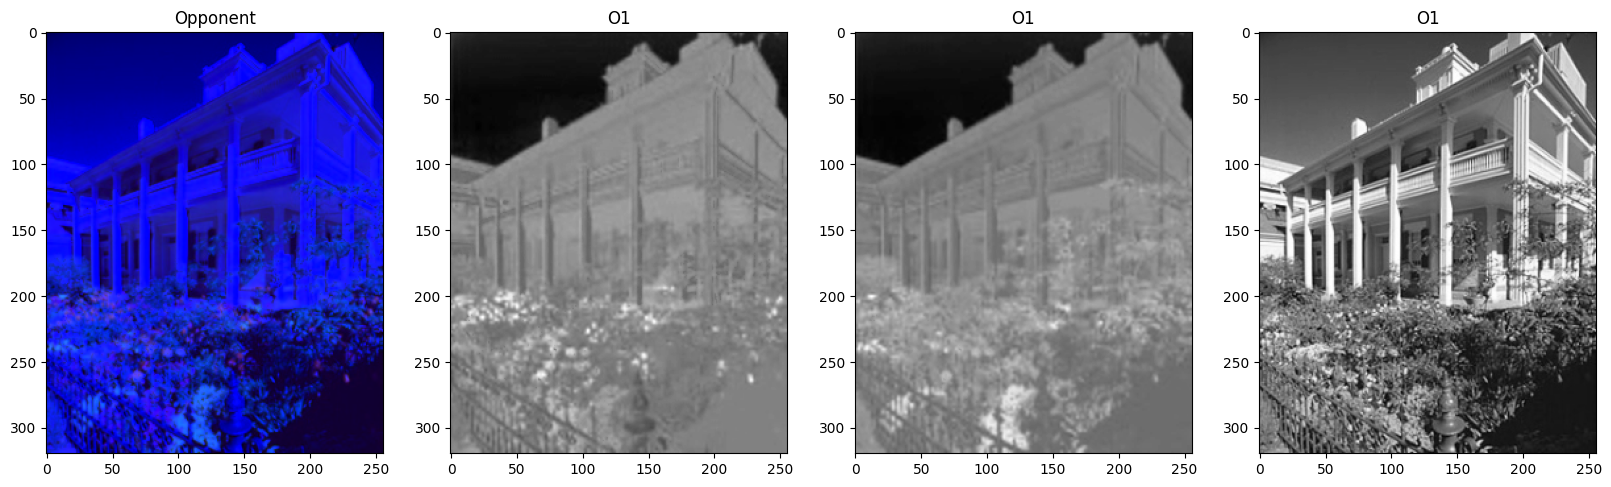

In [6]:
img_path = 'images/awb/awb.jpg'
input_image = cv2.imread(img_path)[...,::-1]
colourspace = 'opponent'
new_image = ConvertColourSpace(input_image, colourspace=colourspace)

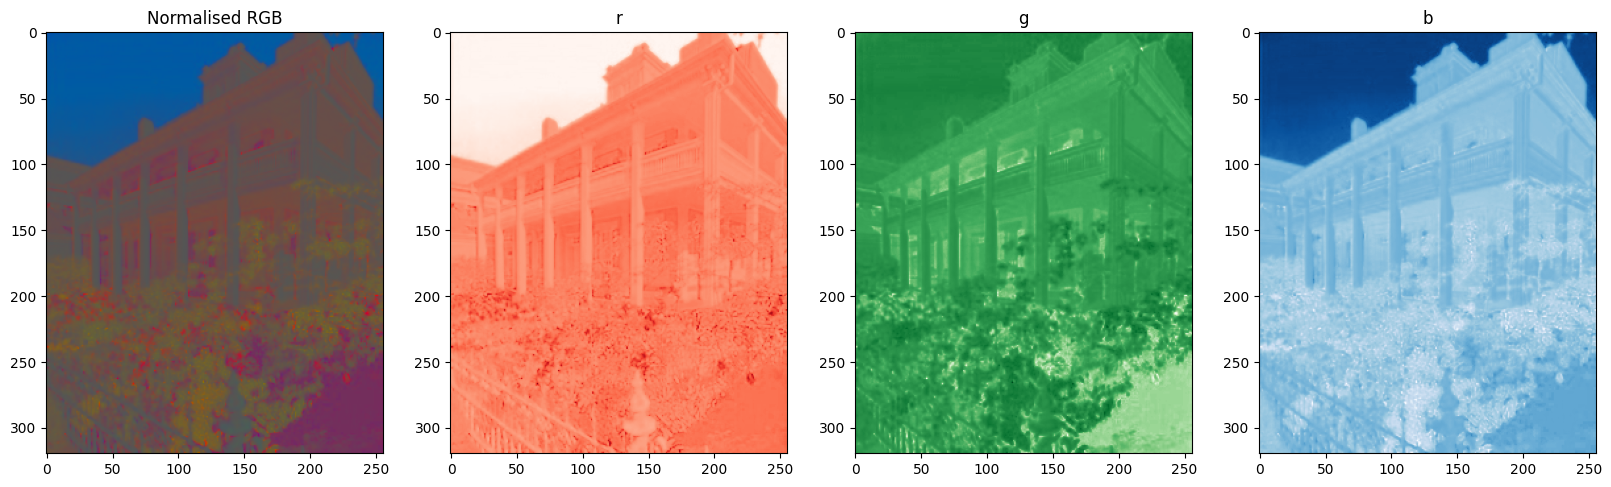

In [7]:
img_path = 'images/awb/awb.jpg'
input_image = cv2.imread(img_path)[...,::-1]
colourspace = 'rgb'
new_image = ConvertColourSpace(input_image, colourspace=colourspace)

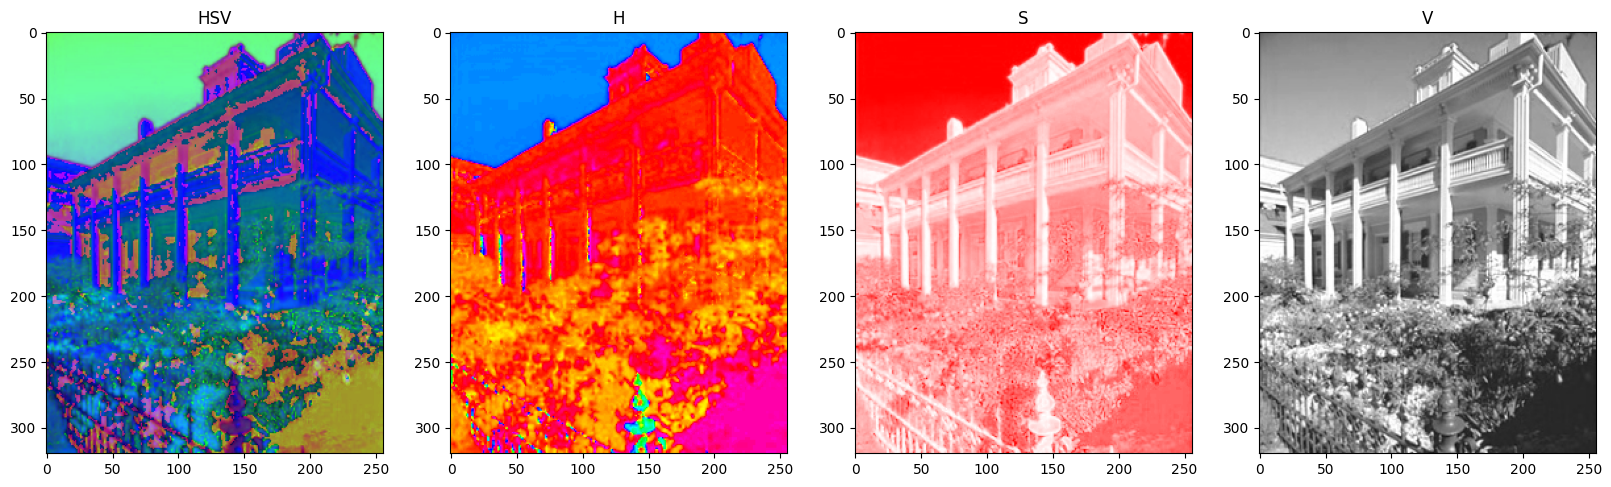

In [8]:
img_path = 'images/awb/awb.jpg'
input_image = cv2.imread(img_path)[...,::-1]
colourspace = 'hsv'
new_image = ConvertColourSpace(input_image, colourspace=colourspace)

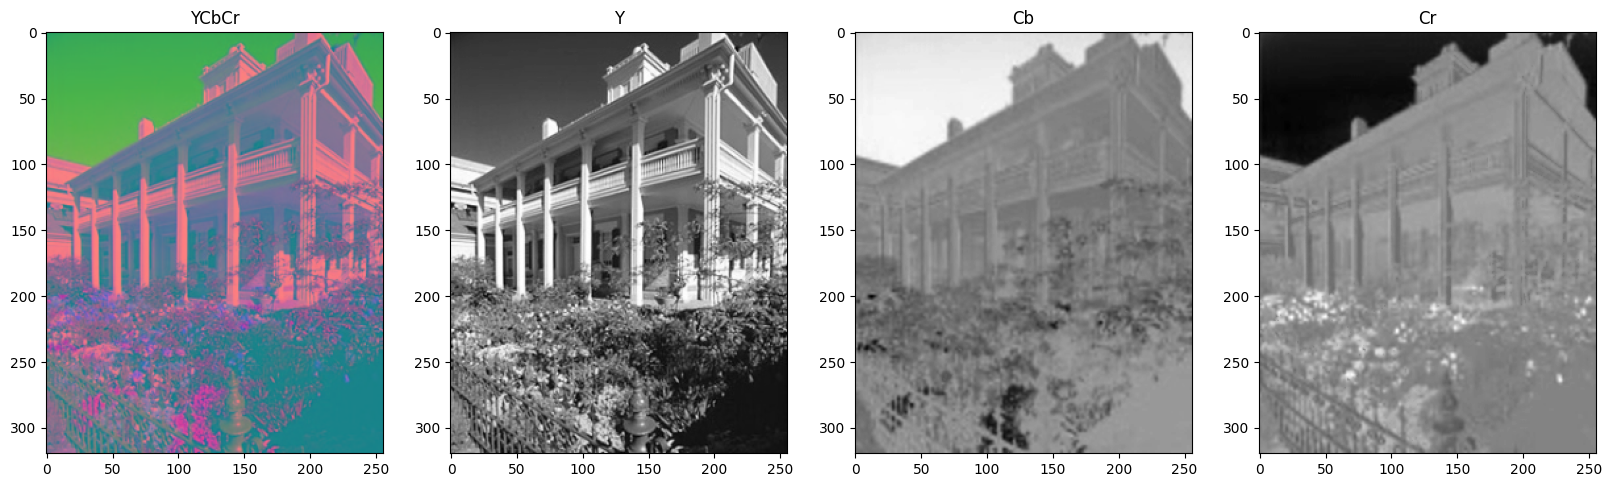

In [9]:
img_path = 'images/awb/awb.jpg'
input_image = cv2.imread(img_path)[...,::-1]
colourspace = 'ycbcr'
new_image = ConvertColourSpace(input_image, colourspace=colourspace)

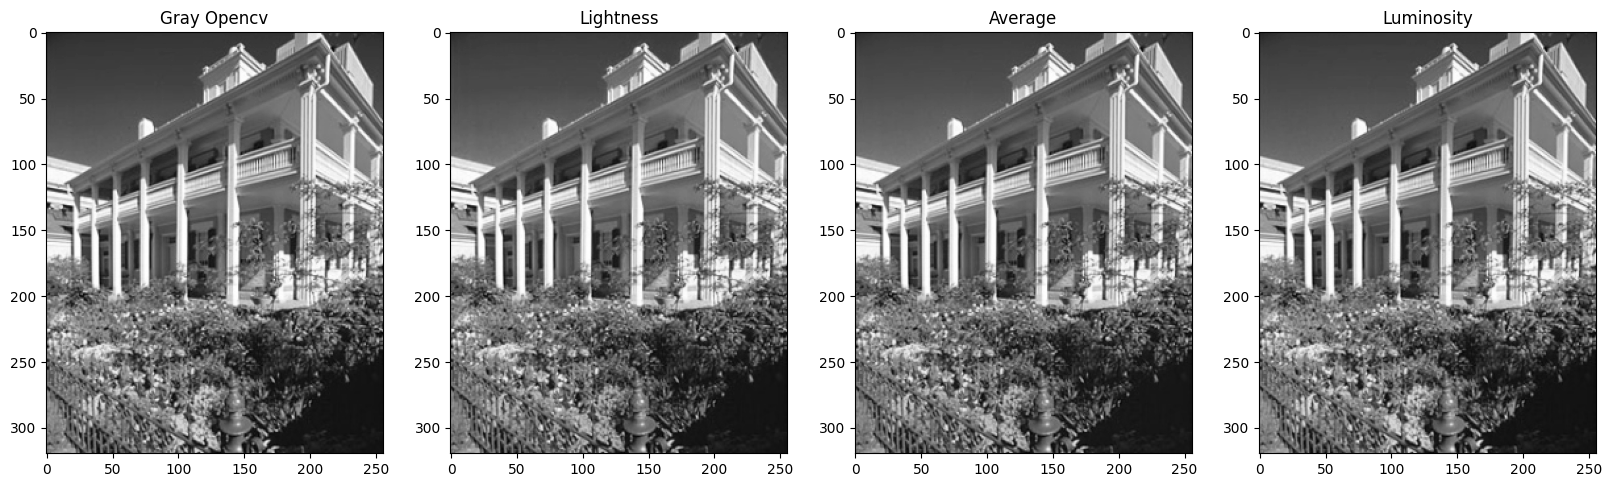

In [10]:
img_path = 'images/awb/awb.jpg'
input_image = cv2.imread(img_path)[...,::-1]
colourspace = 'gray'
new_image = ConvertColourSpace(input_image, colourspace=colourspace)

### 1.3 Colour Space Properties (2 pts)

Explain each of the above 5 colour spaces and their properties. What are the benefits of using a different colour space other than RGB? Provide reasons for each of the above cases. You can include your observations from the visualizations.

opponent: Contains three components. The first element is the luminance component, the second part is the green channel - the red channel. The third element is made of blue and yellow, where yellow is subtracted from blue. We as humans have cones and rods, which respond differently to wavelengths from light. Usually there are three kind of cones, short-wave, medium wave and long wave. However, there exists some overlap in the response from each type of cone. The theory then suggests that it is easier to measure the difference between the responses of the cones, than to measure each cones repsonse alone. The three differences therefore are black-white which is luminance, then red versus green and blue versus yellow. For example, the green/red channel is like recording the difference between the long and medium cones. The biggest advantage of this colour space therefore is that this system is more efficient than for example RGB.


normalized RGB: The difference is that the values are the ratio between the color channel divided by the sum of all the channels. The main benefit of this color space that it is able to remove distortions that are there because of shadows or lights. It removes the effect of light on a image. Another result of this color space is that object detection is easier as well.
hsv: Stands for hue, saturation and value. Usually used by people that want to choose colors, for example for painting with a color wheel. This is done because it is a more natural way to present colors than RGB. This colourspace exists in a cylindrical form. Another benefit is that HSV is easy to compute with, which was a huge benefit in the 70's till the 90's.


ycbcr: Has three channels where the first channel is for luminance, the second are the blue and red difference chroma components. This is the difference between a reference value and the blue or red component. The main benefit of this is colorspace is that the needed bandwith is smaller than for RGB, meaning that the same information can be send, to a computer screen for example with less data than RGB. Therefore, ycbcr is considered lossless compression.


gray: The gray color space that only consists of one channel, where the data represent intensity, the amount of light that is on that pixel. This mean that one pixel can be black, white or any amount of gray in between that. This color space also does not need a lot of bandwith to be transmitted, since the information for one pixel can be stored in 8 bits.

hsv: HSV is a cylindrical colour model that remaps the RGB primary colours into dimensions that are easier for humans to understand. These dimensions are hue, saturation, and value. Hue specifies the angle of the colour on the RGB colour circle. A 0° hue results in red, 120° results in green, and 240° results in blue. Saturation controls the amount of colour used. A colour with 100% saturation will be the purest colour possible, while 0% saturation yields grayscale. Value controls the brightness of the colour. A colour with 0% brightness is pure black while a colour with 100% brightness has no black mixed into the colour. (https://programmingdesignsystems.com/color/color-models-and-color-spaces/index.html)

### 1.4 More on Colour Spaces (1 pt)

Find one more colour space from the literature, briefly explain its properties and give a use case.

CMYK is a color space that is mostly used for printing on paper. It stands for cyan, maganta, yellow and key, which is black. It is a subtractive color model/space. This means that the paper is the natural color and black can be created by adding all the colors to the paper. This is different from an additive color space such as RGB. Where black is the absence of light and white can be created by combining the three primary colors. The ink reduces the amount of light that is reflected by the paper. Producing black in this way can be expensive, since all three colors are needed. Therefore they add the color black to cheapen the cost of printing.

# 2 Colour Constancy *(15 pts)*

Colour constancy is the ability to perceive colors of objects, invariant to the colour of the light source. The aim for colour constancy algorithms is first to estimate the illuminant of the light source, and then correct the image so that the corrected image appears to be taken under a canonical (white) light source. The task of the automatic white balance (AWB) is to do the same in digital cameras so that the images taken by a digital camera look as natural as possible.

In this part of the assignment, you will implement the most famous colour constancy algorithm; *Grey-World Algorithm*. The algorithm assumes that, under a white light source, the average colour in a scene should be achromatic (grey, [128, 128, 128]).

Specific information on the algorithm can be found on:
https://en.wikipedia.org/wiki/Color_normalization#Grey_world



### 2.1 Grey-World algorithm (8 pts)

Complete the function to apply colour correction to an RGB image by using Grey-World algorithm. Display the original image and the colour corrected one on the same figure. Use awb.jpg image (provided in the downloaded zip-file) to test your algorithm. In the end, you should see that the reddish colour cast on the image is removed and it looks more natural.

  ***Note:*** You do not need to apply any pre or post processing steps. For the calculation or processing, you are not allowed to use any available code or any dedicated library function except *standard Numpy functions*.
   

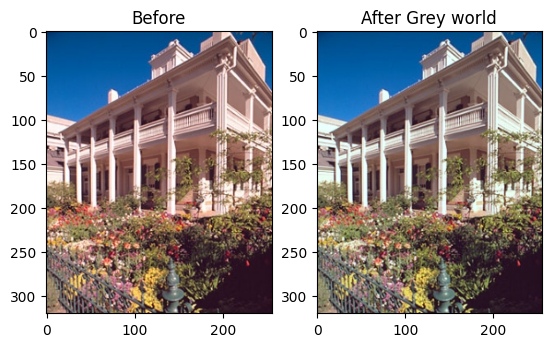

In [11]:
"""
A Method to Improve Robustness of the Gray World Algorithm by Chen Guanghua et al. Was used for an explanation of the alpha, beta, gamma factors. 
"""
def grey_world(awb_img):
    colorCorrectedImg = np.zeros(awb_img.shape)
    awb_img = awb_img / 255
    # calculate the average over every color channel
    r_avg = np.average(awb_img[:,:,0])
    g_avg = np.average(awb_img[:,:,1])
    b_avg = np.average(awb_img[:,:,2])
    # calculate the average value over all the channels
    gray = (r_avg + g_avg + b_avg) / 3
    # the values of alpha, beta and gamma ara calculated as the gray value / channel average
    # we make use of the clipping function since some values go beyond 1, if only by a tiny bit.
    colorCorrectedImg[:,:,0] = np.clip((gray / r_avg) * awb_img[:,:,0], 0, 1)
    colorCorrectedImg[:,:,1] = np.clip((gray / g_avg) * awb_img[:,:,1], 0, 1)
    colorCorrectedImg[:,:,2] = np.clip((gray / b_avg) * awb_img[:,:,2], 0, 1)
    return colorCorrectedImg

awb_img = plt.imread("images/awb/awb.jpg")
new_img = grey_world(awb_img)
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(awb_img)
plt.title("Before")

plt.subplot(1, 2, 2)
plt.imshow(new_img)
plt.title("After Grey world")
plt.show()

### 2.2 Limits of Grey-World (2 pts)

Give an example case for Grey-World Algorithm on where it might fail. Include your reasoning.


It might fail when the balance of colors is off, when one color is dominant over another. This algorithm is then not able to reconstruct the original image. If an image is predominantly green and has only a bit of red, the image would turn very red and not be constructed properly. 

http://therefractedlight.blogspot.com/2011/09/white-balance-part-2-gray-world.html shows an example of this and is my source.

### 2.3 Other Constancy algorithms (5 pts)

Find out one more colour constancy algorithm from the literature and explain it briefly.


Another algorithm is white patch. This algorithm searches for the brightest white patch in the image, it then uses this white patch as a reference point for the rest of the image, since this point is the maximum illuminance it rescales the rest of the image based on that. This algorithm works the best when this assumption of there being a bright white patch is true. Otherwise it can lead to unnatural colors. It also may not work properly when there are multiple light sources or when this patch is not representive of the lighting on the rest of the image.

Sources:
https://python.plainenglish.io/introduction-to-image-processing-with-python-bb39c83366a4 and lecture 3

# 3 Intrinsic Image Decomposition *(12 pts)*


Intrinsic image decomposition is the process of separating an image into its formation components, such as reflectance (albedo) and shading (illumination). <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) Then, under the assumptions of body (diffuse) reflection, linear sensor response and narrow band filters, the decomposition of the observed image $I(\vec{x})$ at position $\vec{x}$ can be approximated as the element-wise product of its albedo $R(\vec{x})$ and shading $S(\vec{x})$ intrinsics:

$$I(\vec{x})=R(\vec{x}) \times S(\vec{x})$$

In this part of the assignment, you will experiment with intrinsic image components to perform a particular computational photography applications: material recolouring. For the experiments, we will use images from a synthetic intrinsic image dataset. <a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2)

<a name="cite_note-1"></a><small>1. [^](#cite_ref-1) H. G. Barrow and J. M. Tenenbaum. Recovering intrinsic scene characteristics from images. Computer Vision Systems, pages 3-26, 1978.</small>

<a name="cite_note-2"></a><small>2. [^](#cite_ref-1) http://www.cic.uab.cat/Datasets/synthetic_intrinsic_image_dataset/



### 3.1 Image decomposition *(2 pts)*

In what other components can an image be decomposed other than albedo and shading? Give an example and explain the concepts in your answer.

Example of components other than albedo and shading that an image can be decomposed is texture and focus. Texture can provide a number of cues about the orientations of the surfaces. These include the information created by perspective scaling of texture elements (scaling), the information created by perspective foreshortening of texels (foreshortening) and, for textures composed of discrete elements, the information created by the effects of both scaling and foreshortening on the relative positions of texels (position). Regarding focus, a strong cue for object depth is also the amount of blur, which increases as the object’s surface moves away from the camera’s focusing distance.

(Computer Vision: Algorithms and Applications 2nd Edition, Richard Szeliski,
https://www.sciencedirect.com/science/article/pii/S0042698997003246)

### 3.2 Synthetic data *(2 pts)*

If you check the literature, you will see that almost all intrinsic image decomposition datasets are composed of synthetic images. What might be the reason for that?

By generating synthetic images with diverse scenes, materials, and lighting conditions, researchers can create datasets that cover a wide range of scenarios. This variability is important for testing the robustness and generalization capabilities of decomposition algorithms. In contrast, real-world images present greater complexity, posing challenges in calculating ground truth information for albedo and shading, as they require precise knowledge of lighting conditions, object geometry, and surface properties.

### 3.3. Reconstructing *(4 pts)*

Pick a favorite object from the synthetic intrinsic image dataset and store it's original image, shading and reflectance in a new folder in *'./images'*, e.g. *./images/intrinsic_images/* (or choose your own folder and change the path in the code). Show that you can actually reconstruct the original PNG image from its intrinsics using the albedo and shading. In the end, your script should output a figure displaying the original image, its intrinsic images and the reconstructed one. Complete the code for function **iid_image_formation()**.

The auxiliary functions are for opening and visualizing the original and intrinsic images. In your submission, only supply the images of the object you picked.

In [11]:
def iid_image_formation(albedo_img, shading_img):
    idd_img = np.multiply(albedo_img/255, shading_img/255)
    return idd_img

In [12]:
def visualize_3(picked_object, picked_object_IDD):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.set_title('Original')
    ax1.imshow((picked_object/picked_object.max()*255.).astype(int))
    ax2.set_title('Reconstructed')
    ax2.imshow((picked_object_IDD/picked_object_IDD.max()*255.).astype(int), cmap='gray')

ball_dl: (266, 480, 3)
objectShading: (266, 480, 3)
objectAlbedo: (266, 480, 3)


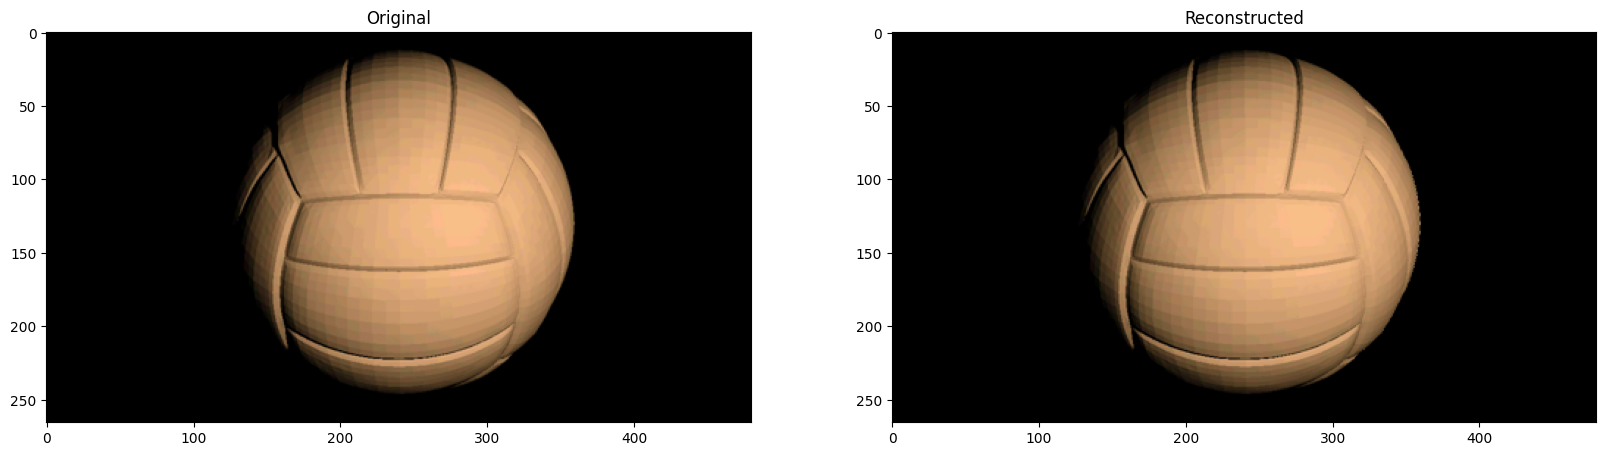

In [13]:
## Replace the image name with a valid image
img_path = './images/'
object_name = 'ball_dl'

## Read with opencv
picked_object = cv2.imread(img_path + object_name + '.png')[...,::-1] / 255.0
if picked_object is None:
    print('no image found')
else:
    print(object_name + ':', picked_object.shape)

objectShading = cv2.imread(img_path + object_name + '_shad.png')[...,::-1]
if objectShading is None:
    print('no image found')
else:
    print('objectShading:', objectShading.shape)

objectAlbedo = cv2.imread(img_path + object_name.split("_")[0] + '_refl.png')[...,::-1]
if objectAlbedo is None:
    print('no image found')
else:
    print('objectAlbedo:', objectAlbedo.shape)

picked_object_IDD = iid_image_formation(objectAlbedo, objectShading)
visualize_3(picked_object, picked_object_IDD)


### 3.4 Recoloring *(4 pts)*


Manipulating colours in photographs is an important problem with many applications in computer vision. Since the aim for recolouring algorithms is just to manipulate colours, better results can be obtained for such a task if the albedo image is available as it is independent of confounding illumination effects.

Assume that you are given the PNG image and you have access to its
intrinsic albedo and shading images.
1. Find out the true material colour of the object you picked in RGB space (which is uniform in this case).
2. Recolour the object's image with pure green (0, 255, 0). Display the original object image and the recoloured version on the same figure. Complete the code for function **recolouring()**.

3. Although you have recoloured the object with pure green, the reconstructed images do not seem to display those pure colors and thus the colour distributions over the object do not appear uniform. Explain the reason.

In [14]:
def recolouring(albedo_img, shading_img):
    # material color albedo
    recoloured_image = np.zeros(albedo_img.shape)#.astype(np.uint8)
    recoloured_image[:,:,1] = np.where(albedo_img[:,:,1]>0, 255.0, 0.0)
    recoloured_image = iid_image_formation(recoloured_image, shading_img)
    plt.imshow(recoloured_image)
    plt.show()
    return recoloured_image

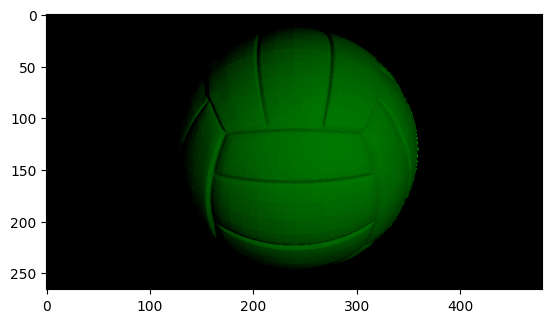

In [15]:
r = recolouring(objectAlbedo, objectShading)

The reconstructed image's colour is not uniform because the shading of the object is not uniform, and varies as it depends on the certain lighting condition.

__Note:__  this was a simple case where the image is synthetic, object centered and has only one colour, and you have access to its ground-truth intrinsic images. Real world scenarios require more than just replacing a single colour with another, not to mention the complexity of achieving a decent intrinsic image decomposition.

# 4 Photometric Stereo *(60 pts)*



In this part of the assignment, you are going to implement the photometric stereo algorithm as described in Section 5.4 (Forsyth and Ponce, *Computer Vision: A Modern Approach*). The chapter snippet has been included in the assignment zip file.

Following this instruction, you will edit and fill in your code in the procedures below **estimate_alb_nrm()**, **check_integrability()** and **construct_surface()**, that you can find in the codecells below (4.1, 4.2 and 4.3, respectively). The main script **photometric_stereo** (4.4) is provided for reference and should not be taken as is. Throughout the assignment, you will be asked to perform different trials and experiments which will require you to adjust the main code accordingly; this also shows how well you can cope with the materials.

Include images of the results into your notebook at informative points. For 3D models, make sure to choose a viewpoint that makes the structure as clear as possible and/or feel free to take them from multiple viewpoints.

### 4.1 Estimating Albedo and Surface Normal *(15 pts)*
Let us start with the grayscale sphere model, which is located in the SphereGray5 folder. The folder contains 5 images of a sphere with a grayscale checker texture under similar lighting conditions as the one in the book. Your task is to estimate the surface reflectance (albedo) and surface normal of this model. The light source directions are encoded in the image file names.

1. Complete the code for function **estimate_alb_nrm()** to estimate albedo and surface normal map for the SphereGray5 folder. What do you expect to see in albedo image and how is it different from your result?

2. In principle, what is the minimum number of images you need to estimate albedo and surface normal? Run the algorithm with more images by using SphereGray25, observe the differences in the results and report. You could try all images at once or a few at the time, in an incremental fashion. Choose a strategy and justify it by discussing your results.

3. What is the impact of shadows in photometric stereo? Explain the trick that is used in the text to deal with shadows. Remove that trick from your implementation and check your results. Is the trick necessary in the case of 5 images? how about 25 images?

An answer box can be found below the code cells.

**Hint**: To get the least-squares solution of a linear system, you can use **numpy.linalg.lstsq** function.

In [26]:
# Helper functions to load the synthetic images

def load_syn_images(image_dir='./images/photometrics_images/SphereGray5/', channel=0, inc_add=False, curr_num=None):
    files = os.listdir(image_dir)
    nfiles = len(files)

    if inc_add:
        files = files[:curr_num]
    
    nfiles = len(files)
    print(f"{nfiles} images")
        
    image_stack = None
    V = 0
    Z = 0.5

    for i in range(nfiles):
        # read input image
        im = cv2.imread(os.path.join(image_dir, files[i]))
        im = np.flip(im, axis=-1)
        im = im[:,:,channel]

        # stack at third dimension
        if image_stack is None:
            h, w = im.shape
            print('Image size (H*W): %d*%d' %(h,w) )
            image_stack = np.zeros([h, w, nfiles], dtype=int)
            V = np.zeros([nfiles, 3], dtype=np.float64)

        image_stack[:,:,i] = im

        # read light direction from image name
        X = np.double(files[i][(files[i].find('_')+1):files[i].rfind('_')])
        Y = np.double(files[i][files[i].rfind('_')+1:files[i].rfind('.png')])
        V[i, :] = [-X, Y, Z]

    # normalization
    image_stack = np.double(image_stack)
    min_val = np.min(image_stack)
    max_val = np.max(image_stack)
    image_stack = (image_stack - min_val) / (max_val - min_val) if max_val!=min_val else np.zeros(image_stack.shape)  # avoid fail when image_stack==0
    normV = np.tile(np.sqrt(np.sum(V ** 2, axis=1, keepdims=True)), (1, V.shape[1]))
    scriptV = V / normV

    return image_stack, scriptV

In [27]:
## Helper function for showing results.

def show_results(albedo, normals, height_map=None, SE=None):
    # Stride in the plot, you may want to adjust it to different images
    stride = 1

    if albedo is not None:
        # showing albedo map
        fig = plt.figure()
        #albedo_max = albedo.max()
        albedo_max = 1
        albedo = albedo / albedo_max
        print(albedo.shape)
        plt.imshow(albedo, cmap="gray")
        plt.show()

    # showing normals as three separate channels
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normals[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normals[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normals[..., 2])
    plt.show()

    # meshgrid
    X, Y, _ = np.meshgrid(np.arange(0,np.shape(normals)[0], stride),
    np.arange(0,np.shape(normals)[1], stride),
    np.arange(1))
    X = X[..., 0]
    Y = Y[..., 0]

    '''
    =============
    You could further inspect the shape of the objects and normal directions by using plt.quiver() function.
    =============
    '''

    if height_map is not None:
      # plotting model geometry
      H = height_map[::stride,::stride]
      fig = plt.figure()
      ax = fig.gca(projection='3d')
      ax.plot_surface(X,Y, H.T)
      plt.show()

    if SE is not None:
      # plotting the SE
      H = SE[::stride,::stride]
      fig = plt.figure()
      ax = fig.gca(projection='3d')
      ax.plot_surface(X,Y, H.T)
      plt.show()

In [28]:
def estimate_alb_nrm(image_stack, scriptV, shadow_trick=True):
    '''
    Compute the gradient of the surface
    INPUT:
        - image_stack : the images of the desired surface stacked up on the 3rd dimension
        - scriptV : matrix V (in the algorithm) of source and camera information
        - shadow_trick: (true/false) whether or not to use shadow trick in solving linear equations
    OUTPUT:
        - albedo : the surface albedo
        - normal : the surface normal
    '''

    h, w, _ = image_stack.shape

    # create arrays for
    # albedo (1 channel)
    # normal (3 channels)
    albedo = np.zeros([h, w])
    normal = np.zeros([h, w, 3]) #(N1, N2, N3) in the directions of (x, y, z)

    # for each point in the image array
    for y in range(h):
        for x in range(w):
            # stack image values for pixel at (y,x) into a intesity vector i
            i = image_stack[y, x, :].flatten()

            if shadow_trick:
                # construct the diagonal matrix scriptI
                scriptI = np.diag(i)    
                # solve scriptI * scriptV * g = scriptI * i to obtain g for this point
                # from Ax = b
                A = np.dot(scriptI, scriptV)
                b = np.dot(scriptI, i)
                
            else:
                # solve i = scriptV * g to obtain g for this point
                A = scriptV
                b = i
            
            g = np.linalg.lstsq(A, b, rcond=None)[0]         
            
            # albedo at this point is |g|
            albedo[y, x] = np.linalg.norm(g)
            
            # normal at this point is g / |g|
            if albedo[y, x] > 0: # prevent zero-division error
                normal[y, x, :] = g / albedo[y, x]
    # Reference: Chapter5_CV_A_Modern_Approach page:82-83.
    
    return albedo, normal


4 images
Image size (H*W): 512*512
(512, 512)


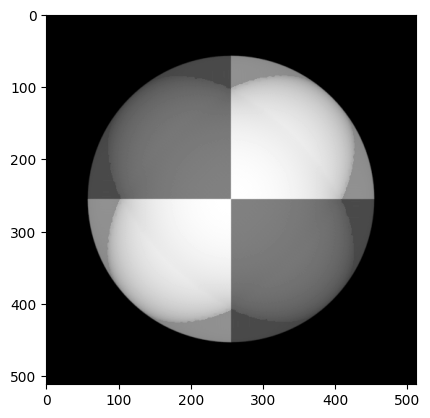

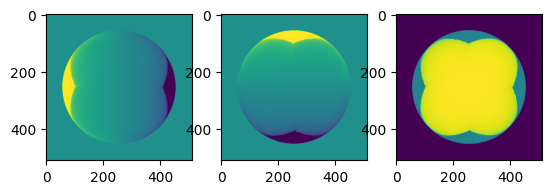

NO shadow trick
(512, 512)


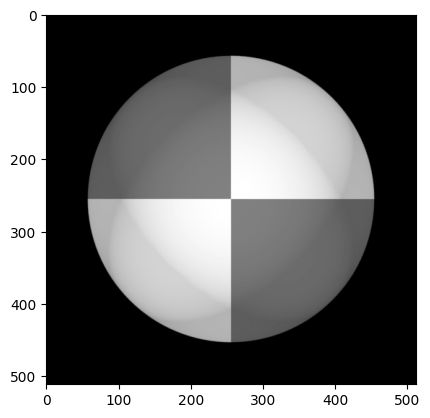

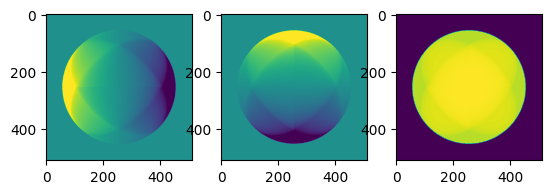

24 images
Image size (H*W): 512*512
(512, 512)


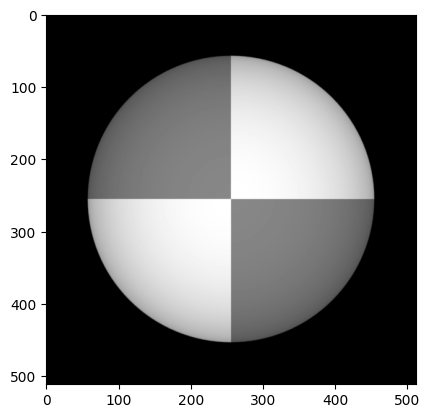

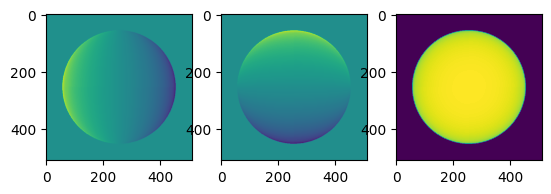

NO shadow trick
(512, 512)


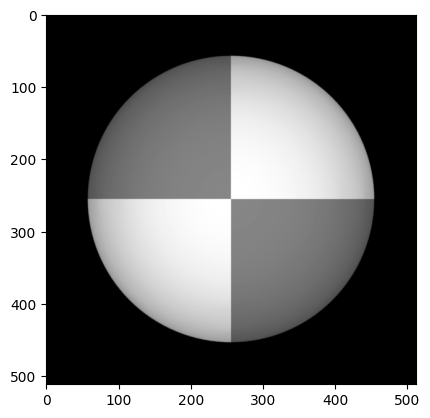

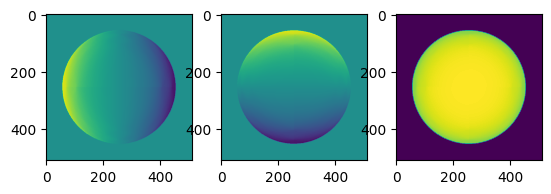

3 images
Image size (H*W): 512*512
(512, 512)


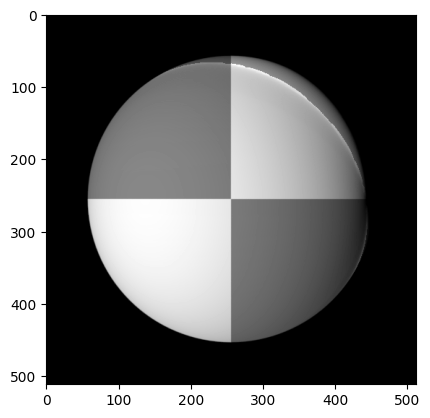

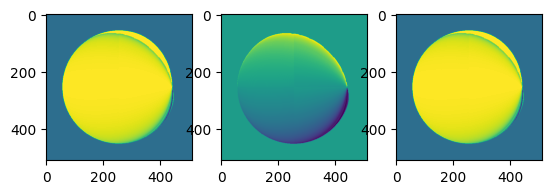

5 images
Image size (H*W): 512*512
(512, 512)


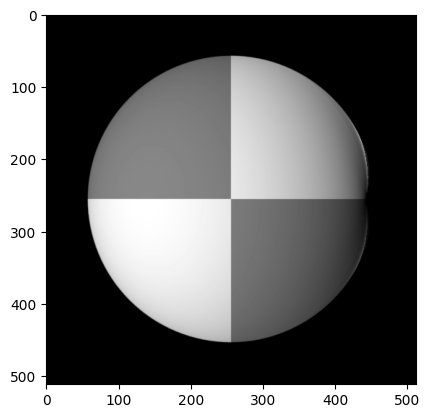

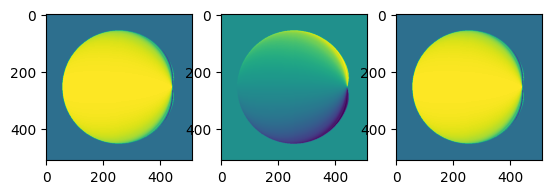

10 images
Image size (H*W): 512*512
(512, 512)


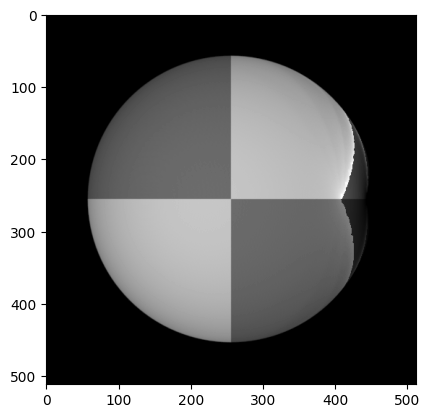

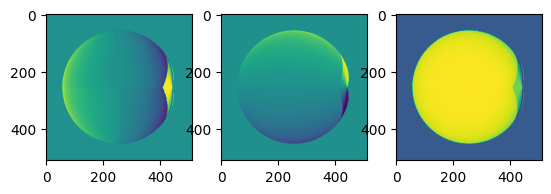

20 images
Image size (H*W): 512*512
(512, 512)


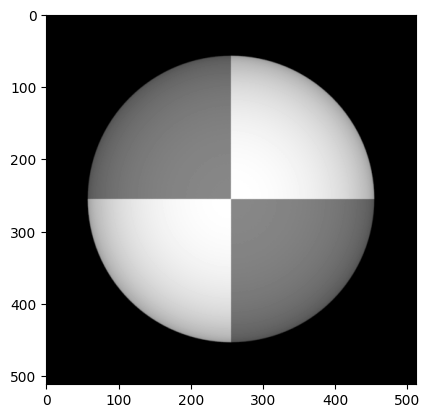

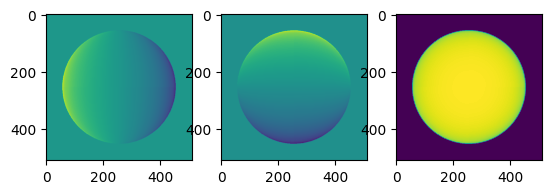

24 images
Image size (H*W): 512*512
(512, 512)


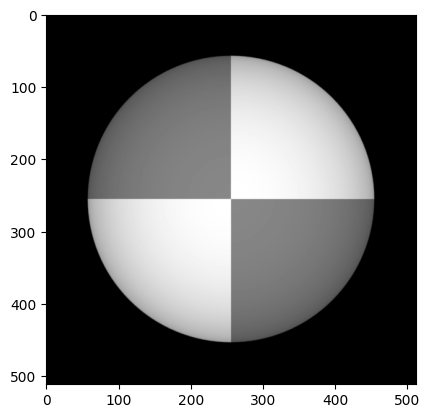

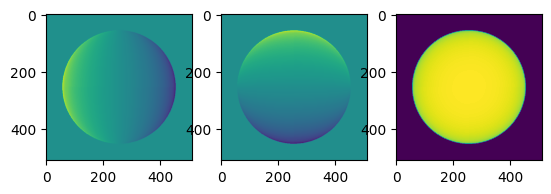

In [29]:
# load syn images (4 images)
image_stack, scriptV = load_syn_images(image_dir='./images/photometrics_images/SphereGray5/')
# estimate_alb_nrm
albedo4, normals4 = estimate_alb_nrm(image_stack, scriptV, shadow_trick=True)
# Show results
show_results(albedo4, normals4)
# no shadow trick
print("NO shadow trick")
albedo4_no_st, normals4_no_st = estimate_alb_nrm(image_stack, scriptV, shadow_trick=False)
show_results(albedo4_no_st, normals4_no_st)


# load syn images (24 images all at once)
image_stack, scriptV = load_syn_images(image_dir='./images/photometrics_images/SphereGray25/')
# estimate_alb_nrm
albedo24, normals24 = estimate_alb_nrm(image_stack, scriptV, shadow_trick=True)
# Show results
show_results(albedo24, normals24)
# no shadow trick
print("NO shadow trick")
albedo24_no_st, normals24_no_st = estimate_alb_nrm(image_stack, scriptV, shadow_trick=False)
show_results(albedo24_no_st, normals24_no_st)


# load syn images (24 images, incremental addition strategy)
for n in [3, 5, 10, 20, 24]:
    image_stack, scriptV = load_syn_images(image_dir='./images/photometrics_images/SphereGray25/', inc_add=True, curr_num=n)
    # estimate_alb_nrm
    albedo_incadd, normals_incadd = estimate_alb_nrm(image_stack, scriptV, shadow_trick=True)
    # Show results
    show_results(albedo_incadd, normals_incadd)

1. 
In the albedo image, we expect to observe the grayscale checkered pattern of the sphere model without any influences from shading or lighting/highlight.  In other words, we expect to see gray and white squares in a circle, representing the true/intrinsic colors of the spehere, and it should be consistent across the entire surface (without any shadows or shading effects). 

In our findings, using the original 5 images from the SphereGray5 set, the generated albedo image indeed displayed a grayscale checker pattern consistent with our expectations. There were noticable differences to our expectations, such as, it appeared as if the direct lighting was concentrated on the center, leading to shadows or darker regions along the edges/circumference of the sphere. However, we realized that the results of this set had no difference compared to the SphereGray25 set, which is important for future questions.

For more effective analysis, we were instructed to exclude the image 'Sphere_0.0_0.0" and re-process on 4 images with specific lighting conditions. The resulting albedo image is above. As can be seen from the albedo image, the pattern resembles a four-leaf clover shape, with darker areas around the edges and brighter regions internally, which is not in line with our expectations. This pattern and any other deviations suggests that the implementation may still be incorparting the noise in the images, or, the direction or intensity of the light source may not be approximated correctly.


2. 
We are trying to figure out the 3D direction of the surface normal, which has 3 components. To solve for them, we require a minimum of three distinct lighting conditions, each providing a linear equation. Hence, we need information from at least 3 different lighting conditions. However, using more than 3 images such as SphereGray25 can improve accuracy. 

Our analysis revealed that the albedo image produced using all of the SphereGray25 set (excluding 'Sphere_0.0_0.0') at once showed a grayscale checker pattern consistent with our expectations. Although, it did not achieve a flawless albedo due to the darker edges (similar to results obtained with original 5 images described above), it was an improvement over the 4-image version displaying a 4-leaf clover pattern. 

In the incremental analysis, with three images, the top-right quadrant of the albedo appeared darker, suggesting an inconsistent lighting condition and noise. With five, a shadow formed on the right-middle part of the sphere almost as if there was a slight inward indentation on the surface. This shadow effect become more obvious, taking the appearance of an arrow pointing inwards from the right with ten images. Analysis with 20 and 24 images were almost identical outcomes with subtle shadows on the edges, same as the results obtained with processing all images at once. 
In addition, in the surface normal visualizations, the yellow clover-leaf pattern from the 4-image set disappeared in the 24-image dataset, getting replaced by a single yellow circle. When we added images incrementally, the albedo irregularities were reflected in the surface normal visualizations, but as more images were added, these errors become smoother patterns.


3. 
Shadows cause inaccuracies in results by influencing true surface normal and albedo estimation due to lack of important light information in regions where light doesn't directly hit. The trick that is employed above, as drawn from Section 5.4 of Forsyth and Ponce, Computer Vision: A Modern Approach (pg.82-83), involves constructing a diagonal matrix 'scriptI' from pixel intensities. When this matrix multiplies both sides of the given linear system, it has the effect of scaling down shadowed (low intensity) regions.

Our observations show that for the 4-image dataset, the sharp 4-leaf clover pattern was reduced in the albedo image without the shadow trick. However, with the 24-image dataset, the difference in the albedo image without the trick was negligible compared to the image generated with the shadow trick. However, in this case, the surface normals were not as smooth, and a faint 4-leaf clover pattern emerged.

Based on this observation, for the 4-image dataset, the shadow trick seems unnecessary and may even worsen the result. But, for the 24-image dataset, while the albedo isn't significantly affected, the trick ensures smoother and more accurate normals. Hence, the effect of the shadow trick depends on the number of images and their respective lighting conditions.

### 4.2 Test of Integrability *(10 pts)*



Before we can reconstruct the surface height map, it is required to compute the partial derivatives $\frac{\delta f}{\delta x}$ and $\frac{\delta f}{\delta y}$ (or *p* and *q* in the algorithm). The partial derivatives also give us a chance to double check our computation, namely the test of *integrability*.

#### 4.2.1. Compute the partial derivatives (p and q in the algorithm) by filling in your code into **check_integrability()** (5 pts).

In [30]:
def check_integrability(normals):
    '''
    Check the surface gradient is acceptable
    INPUTS:
        - normals: normal image
    OUTPUTS:
        - p : df / dx
        - q : df / dy
        - SE : Squared Errors of the 2 second derivatives
    '''

    # initalization
    p = np.zeros(normals.shape[:2])
    q = np.zeros(normals.shape[:2])
    SE = np.zeros(normals.shape[:2])


    # Compute p and q, where
    # p measures value of df / dx
    # q measures value of df / dy
    
    # Given normal = (N1, N2, N3), 
    # p = N1/N3
    p = normals[:, :, 0] / normals[:, :, 2]
    # q = N2/N3
    q = normals[:, :, 1] / normals[:, :, 2]

    # change nan to 0
    p[p!=p] = 0
    q[q!=q] = 0

    # approximate second derivate by neighbor difference
    # np.gradient calculates the approximate gradient
    dp_dy = np.gradient(p, axis=0) # rows, y-direction
    dq_dx = np.gradient(q, axis=1) # columns, x-direction
    # and compute the Squared Errors SE of the 2 second derivatives SE
    SE = (dp_dy - dq_dx) ** 2
    # Reference: Chapter5_CV_A_Modern_Approach page:85.
    
    return p, q, SE

# Use the normals that you found in the previous question
p, q, SE = check_integrability(normals4)
print('4-image SE:', SE.shape, SE.max())
threshold = SE.mean() + SE.std()
print("threshold for 4 images: ", threshold)


p, q, SE = check_integrability(normals4_no_st)
print('4-image SE (no shadow trick):', SE.shape, SE.max())
threshold = SE.mean() + SE.std()
print("threshold for 4 images (no shadow trick): ", threshold)


# For 24 images
p, q, SE = check_integrability(normals24)
print('24-image SE:', SE.shape, SE.max())
threshold = SE.mean() + SE.std()
print("threshold for 24 images: ", threshold)

4-image SE: (512, 512) 2.4055106513337705
threshold for 4 images:  0.042341282827348704
4-image SE (no shadow trick): (512, 512) 0.16825926100480726
threshold for 4 images (no shadow trick):  0.002203745317111903
24-image SE: (512, 512) 0.8325460669861867
threshold for 24 images:  0.006972022347224507


C:\Users\desto\AppData\Local\Temp\ipykernel_15600\1365357582.py:24: RuntimeWarning: invalid value encountered in true_divide
  p = normals[:, :, 0] / normals[:, :, 2]
C:\Users\desto\AppData\Local\Temp\ipykernel_15600\1365357582.py:26: RuntimeWarning: invalid value encountered in true_divide
  q = normals[:, :, 1] / normals[:, :, 2]


#### 4.2.2. Second derivatives (5 pts)

Implement and compute the second derivatives according to the algorithm and perform the test of integrability by choosing a reasonable threshold. What could be the reasons for the errors? How does the test perform with different numbers of images used in the reconstruction process in 4.1?

Given p and q, the second derivatives are computed using numpy's gradient function as shown above. Referring to Section 5.4 of Forsyth and Ponce, Computer Vision: A Modern Approach (pg.85), the squared error is then computed by finding the squared difference betweeen these two second derivatives, which should ideally be close to zero. We used the most optimal image combinations analyzed in the previous exercise (4-images without shadow trick and 24-images with shadow trick), and set the threshold to the mean of SE + standard deviation of SE in order to ensure that we consider not only the outliers but also the general trend of inconsistencies. In our analysis, for the 4-image (with shadow trick) set, we observed a SE of $\approx$  2.4055 with a threshold of $\approx$ 0.0423. In contrast, for the 4-image without the shadow trick we obtained a SE of $\approx$ 0.1683 with a threshold of $\approx$ 0.0022. For the 24-image set, the maximum SE reduced to $\approx$ 0.8325 with a threshold of $\approx$ 0.0069.

There could be various reasons for errors such as but not limited to noise present in the image, accumulated errors due to approximations in computation, and other issues arising from effects like shadows. Moreover, the runtime warnings suggest division by zero errors, particularly when dividing by the third component of the normals, leading to nan values for our calculations.

For the 4-image set, using the shadow trick resulted in a much higher SE compared to without the trick. Comparing the 4-image results (with the shadow trick) to the 24-image results, we can conclude that increasing the number of images improves the outcome, as observed by the reduced SE from 0.1683 to 0.8325. In conclusion, using more images has improved the accuracy of the estimated normals. While the shadow trick might be beneficial in some contexts, increasing the number of images used aids in refining the irregularities.

### 4.3 Shape by Integration *(15 pts)*  
To reconstruct the surface height map, we need to continuously integrate the partial derivatives over a path. However, as we are working with discrete structures, you will be simply summing their values.

The algorithm in the chapter presents a way to do the integration in column-major order, that is you start at the top-left corner and integrate along the first column, then go towards the right along each row. Yet, it is also noticed that it would be better to use many different paths and average so as to spread around the errors in the derivative estimates.

#### 4.3.1. Construct the surface height map (7 pts)

Construct the surface height map using column-major order as described in the algorithm, then implement row-major path integration. Your code should go in **construct_surface()**.

**Note**: By default, Numpy used row-major operations. So if you are unrolling an image to linearize the operation, you will end up with a row-major representation. Numpy can be configured to be column-major. Otherwise, if you are using the double for-loops without an unrolling operation, then this concern doesn’t apply.

**Hint**: You could further inspect the shape of the objects and normal directions by using **matplotlib.pyplot.quiver** function. You will have to choose appropriate sub-sampling ratios for proper illustration. You code goes to the **show_results()** function in the code cell above.

p: (512, 512) q: (512, 512) 1.4027377844520355
(512, 512)


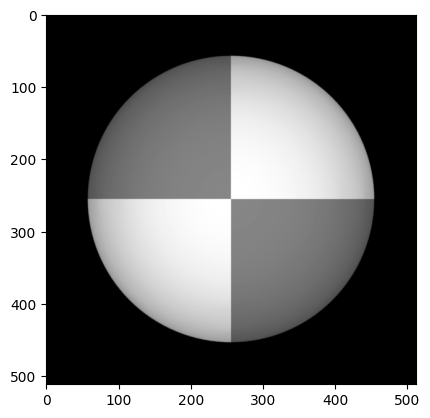

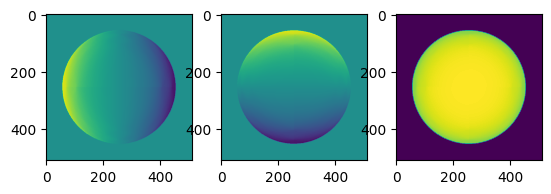

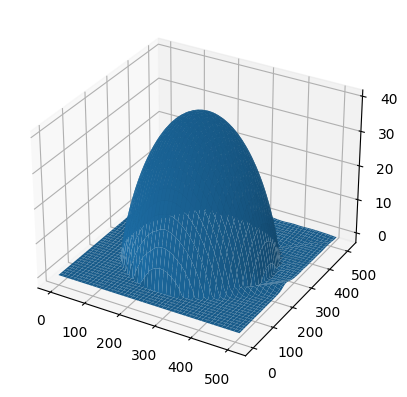

In [32]:
def construct_surface(p, q, path_type='average'):
    '''
    Construct the surface function represented as height_map
    INPUT:
       - p : measures value of df / dx
       - q : measures value of df / dy
       - path_type: type of path to construct height_map, either 'column',
         'row', or 'average'
    OUTPUT:
       - height_map: the reconstructed surface
    '''

    h, w = p.shape
    height_map = np.zeros([h, w])

    if path_type=='column':
        # top left corner of height_map is zero
        height_map[0, 0] = 0
        
        # for each pixel in the left column of height_map
        for i in range(1, h):
            
            # height_value = previous_height_value + corresponding_q_value
            height_map[i, 0] = height_map[i-1, 0] + q[i-1, 0]
        
        # for each row
        for i in range(h):

            # for each element of the row except for leftmost
            for j in range(1, w):
                
                # height_value = previous_height_value + corresponding_p_value
                height_map[i, j] = height_map[i, j-1] + p[i, j-1]
        


    elif path_type=='row':
        # top left corner of height_map is zero
        height_map[0, 0] = 0

        # for each pixel in the top row of height_map
        for i in range(1, w):
            height_map[0, i] = height_map[0, i-1] + p[0, i-1]

        # for each row except for topmost
        for i in range(1, h):

            # for each element of the row 
            for j in range(w):
                height_map[i, j] = height_map[i-1, j] + q[i-1, j]
        

    elif path_type=='average':
        # top left corner of height_map is zero
        height_map[0, 0] = 0
        
        # for each pixel
        for i in range(h):
            for j in range(w):

                # height_value = (previous_height_values + correseponding_p_and_q_values) / 2 
                height_map[i, j] = (height_map[i-1, j] + height_map[i, j-1] + p[i-1, j-1] + q[i-1, j-1]) / 2
        

    return height_map

print('p:', p.shape, 'q:', q.shape, q.max())
height_map = construct_surface(p, q)

show_results(albedo24_no_st, normals24_no_st, height_map)

#### 4.3.2. What are the differences in the results of the two paths? (4 pts)


*Write your answer here*

#### 4.3.3. Now, take the average of the results. (4 pts)

Do you see any improvement compared to when using only one path? Are the construction results different with different numbers of images being used?

*Write your answer here*

### 4.4 Experiments with different objects *(20 pts)*
In this part, you will try to run the photometric stereo algorithm in a various number of scenarios to see how well it can be generalized.

#### 4.4.1. Run the algorithm and show the results for the MonkeyGray model. *(5 pts)*

##### 1.a Complete the code below, run the algorithm and show the results

Loading images...

121 images
Image size (H*W): 512*512
Finish loading 121 images.

Computing surface albedo and normal map...

Integrability checking

Number of outliers: 1835



C:\Users\desto\AppData\Local\Temp\ipykernel_15600\1365357582.py:24: RuntimeWarning: invalid value encountered in true_divide
  p = normals[:, :, 0] / normals[:, :, 2]
C:\Users\desto\AppData\Local\Temp\ipykernel_15600\1365357582.py:26: RuntimeWarning: invalid value encountered in true_divide
  q = normals[:, :, 1] / normals[:, :, 2]


(512, 512)


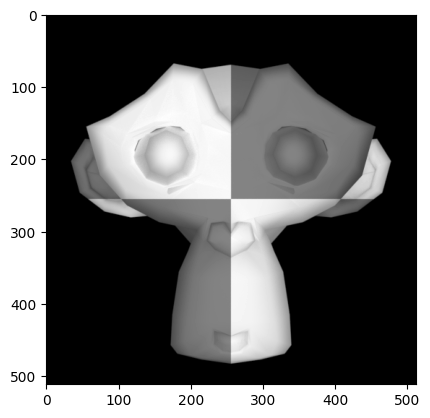

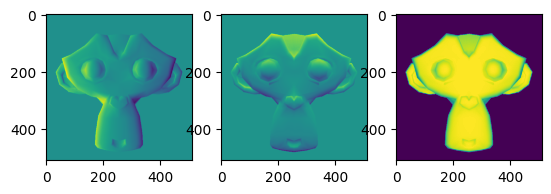

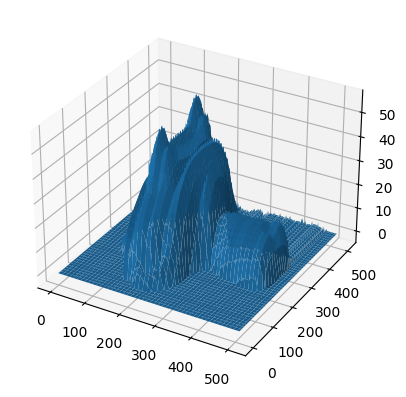

In [33]:
def photometric_stereo(image_dir='./images/photometrics_images/MonkeyGray/'):

    # obtain many images in a fixed view under different illumination
    print('Loading images...\n')
    [image_stack, scriptV] = load_syn_images(image_dir)
    [h, w, n] = image_stack.shape
    print('Finish loading %d images.\n' % n)

    # compute the surface gradient from the stack of imgs and light source mat
    print('Computing surface albedo and normal map...\n')
    albedo, normals = estimate_alb_nrm(image_stack, scriptV, shadow_trick=True)


    # integrability check: is (dp / dy  -  dq / dx) ^ 2 small everywhere?
    print('Integrability checking\n')
    p, q, SE = check_integrability(normals)
    

    threshold = SE.mean() + SE.std()
    print('Number of outliers: %d\n' % np.sum(SE > threshold))
    SE[SE <= threshold] = float('nan') # for good visualization

    # compute the surface height
    height_map = construct_surface(p, q, path_type='column')  


    # show results
    show_results(albedo, normals, height_map)


# Use the function
image_dir = 'images/photometrics_images/MonkeyGray/'
photometric_stereo(image_dir)

##### 1.b Explain errors

The albedo results of the monkey may comprise more albedo errors than in case of the sphere. Observe and describe the errors: Experiment with different cases and observe the errors that arise. (You don't need to calculate and give numerical errors.)

What could be the reason for those errors? You may want to experiment with different numbers of images as you did in Question 1 to see the effects.

In the image featuring the monkey, certain errors are evident in the albedo results when compared to those of the sphere. These errors arise because the image of the monkey contains intricate facial details, while the image of the sphere represents a simple, smooth spherical object. This complexity in the monkey image makes it challenging to accurately capture all the details within the albedo images, particularly when working with a limited number of shading images. Consequently, the results may not achieve full accuracy. To precisely capture all the variations present in the monkey image, a more extensive set of shading images is required.

##### 1.c What do you think could help solving these errors?

Expanding the dataset to include a larger set of images encompassing various shading variations could potentially yield more favorable results as it could enhance the accuracy of albedo estimation.

#### 4.4.2. Three-channel images. *(5 pts)*

So far, we have assumed that albedos are 1-channel grayscale images and that input images are also 1-channel. To work with 3-channel images, a simple solution is to split the input image into separate channels and treat them individually. Yet, that would generate a small problem while constructing the surface normal map if a pixel value in a channel is zero.


##### 2.a Update the implementation to work for 3-channel RGB inputs and test it with 2 models SphereColor and MonkeyColor.


In [34]:
## Helper function for showing results.

def show_results_RGB(albedo, normals, height_map=None, SE=None):
    # Stride in the plot, you may want to adjust it to different images
    stride = 1

    if albedo is not None:
        # showing albedo map
        fig = plt.figure()
        #albedo_max = albedo.max()
        albedo_max = 1
        albedo = albedo / albedo_max
        print(albedo.shape)
        plt.imshow(albedo)
        plt.show()

    # showing normals as three separate channels
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normals[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normals[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normals[..., 2])
    plt.show()

    # meshgrid
    X, Y, _ = np.meshgrid(np.arange(0,np.shape(normals)[0], stride),
    np.arange(0,np.shape(normals)[1], stride),
    np.arange(1))
    X = X[..., 0]
    Y = Y[..., 0]

    '''
    =============
    You could further inspect the shape of the objects and normal directions by using plt.quiver() function.
    =============
    '''

    if height_map is not None:
      # plotting model geometry
      H = height_map[::stride,::stride]
      fig = plt.figure()
      ax = fig.gca(projection='3d')
      ax.plot_surface(X,Y, H.T)
      plt.show()

    if SE is not None:
      # plotting the SE
      H = SE[::stride,::stride]
      fig = plt.figure()
      ax = fig.gca(projection='3d')
      ax.plot_surface(X,Y, H.T)
      plt.show()

In [51]:
def photometric_stereo_rgb(image_dir='./images/photometrics_images/MonkeyGray/', channels = 3):
    albedo = []
    normals = []
    print('Loading images...\n')
    for ch in range(channels):
        image_stack_ch0, scriptV_ch0 = load_syn_images(image_dir=image_dir, channel=ch)
        albedo_ch, normals_ch = estimate_alb_nrm(image_stack_ch0, scriptV_ch0, shadow_trick=True)
        albedo.append(albedo_ch)
        normals.append(normals_ch)
    # [h, w, n] = image_stack_ch0.shape
    
    # # concatenate albedo
    albedo = np.concatenate((albedo[0][:,:,None], albedo[1][:,:,None], albedo[2][:,:,None]), axis=2)
    normal_mean = (normals[0] + normals[1] + normals[2]) / 3
    
    # integrability check: is (dp / dy  -  dq / dx) ^ 2 small everywhere?
    print('Integrability checking\n')
    p, q, SE = check_integrability(normal_mean)
    
    threshold = SE.mean() + SE.std()
    print('Number of outliers: %d\n' % np.sum(SE > threshold))
    SE[SE <= threshold] = float('nan') # for good visualization
    
    # compute the surface height
    height_map = construct_surface(p, q, path_type='column')  
    
    # show results
    show_results_RGB(albedo, normal_mean, height_map)

Loading images...

25 images
Image size (H*W): 512*512
25 images
Image size (H*W): 512*512
25 images
Image size (H*W): 512*512
Integrability checking

Number of outliers: 1624



C:\Users\desto\AppData\Local\Temp\ipykernel_15600\1365357582.py:24: RuntimeWarning: invalid value encountered in true_divide
  p = normals[:, :, 0] / normals[:, :, 2]
C:\Users\desto\AppData\Local\Temp\ipykernel_15600\1365357582.py:26: RuntimeWarning: invalid value encountered in true_divide
  q = normals[:, :, 1] / normals[:, :, 2]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)


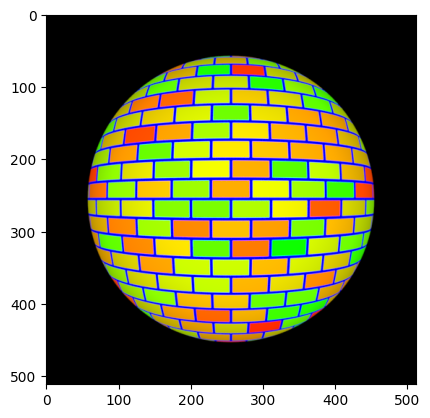

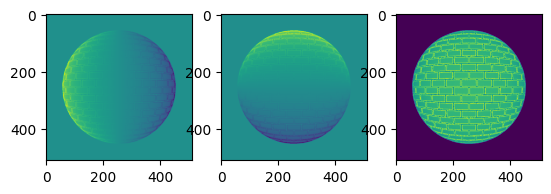

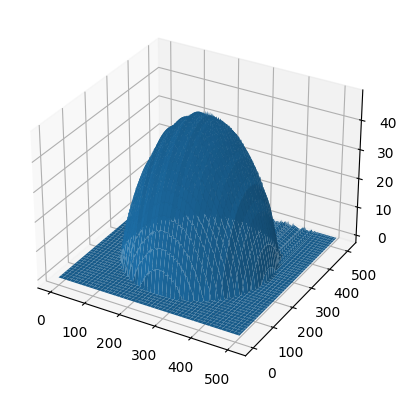

In [52]:
photometric_stereo_rgb(image_dir='./images/photometrics_images/SphereColor/')

Loading images...

121 images
Image size (H*W): 512*512
121 images
Image size (H*W): 512*512
121 images
Image size (H*W): 512*512
Integrability checking

Number of outliers: 1872



C:\Users\desto\AppData\Local\Temp\ipykernel_15600\1365357582.py:24: RuntimeWarning: invalid value encountered in true_divide
  p = normals[:, :, 0] / normals[:, :, 2]
C:\Users\desto\AppData\Local\Temp\ipykernel_15600\1365357582.py:26: RuntimeWarning: invalid value encountered in true_divide
  q = normals[:, :, 1] / normals[:, :, 2]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)


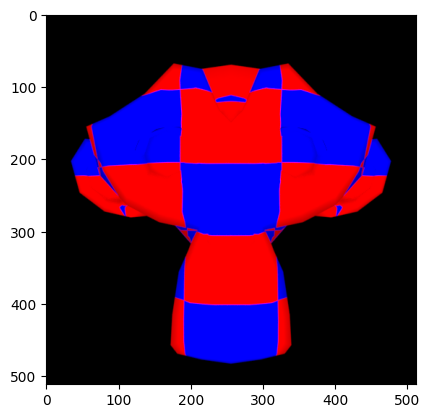

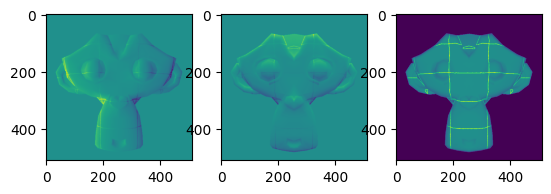

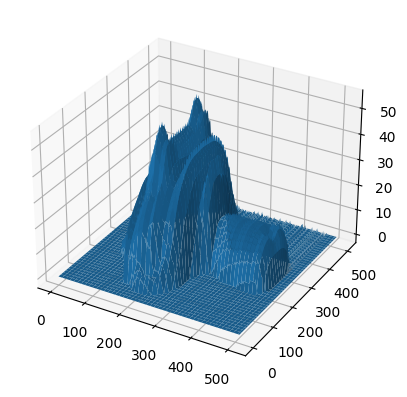

In [53]:
photometric_stereo_rgb(image_dir='./images/photometrics_images/MonkeyColor/')


##### 2.b Explain your changes and show your results.

During the process, we introduce alterations to the calculation of normals and albedo. Specifically, we compute the mean of normals, and for the albedo, we concatenate the three color channels.

##### 2.c Observe the problem in the constructed surface normal map and height map. Explain why a zero pixel could be a problem and propose a way to overcome that.

So the problem is that the example with the monkey contains only red and blue colors so it has values only in the red and blue channels. The green channel contains only zeros so we should exclude this channel from our calculations.


#### 4.4.3. Real world dataset A *(5 pts)*   

Now, it's the time to try the algorithm on real-world datasets. For that purpose, we are going the use the Yale Face Database and the Apple dataset.

First the Yale Face Database.

##### 3.a Run the algorithm for the Yale Face images: [Yale Face Database](http://cvc.cs.yale.edu/cvc/projects/yalefaces/yalefaces.html). The Yale face data is included in the lab material.

##### 3.b Observe and discuss the results for different integration paths.

An answer box can be found below the code cells.

**Hint**: For proper computation of albedo and surface normal, you may want to suspend the shadow trick described in the text, and use the original formula:
$$i = Vg(x,y)$$

In [33]:
## help functions for loading Yale Face and Apple images

def load_face_images(image_dir='./images/photometrics_images/yaleB02/'):
    num_images = 64
    filename = os.path.join(image_dir, 'yaleB02_P00_Ambient.pgm')
    ambient_image = cv2.imread(filename, -1)
    h, w = ambient_image.shape

    # get list of all other image files
    import glob
    d = glob.glob(os.path.join(image_dir, 'yaleB02_P00A*.pgm'))
    import random
    d = random.sample(d, num_images)
    filenames = [os.path.basename(x) for x in d]

    ang = np.zeros([2, num_images])
    image_stack = np.zeros([h, w, num_images])

    for j in range(num_images):
        ang[0,j], ang[1,j] = np.double(filenames[j][12:16]), np.double(filenames[j][17:20])
        image_stack[...,j] = cv2.imread(os.path.join(image_dir, filenames[j]), -1) - ambient_image


    x = np.cos(np.pi*ang[1,:]/180) * np.cos(np.pi*ang[0,:]/180)
    y = np.cos(np.pi*ang[1,:]/180) * np.sin(np.pi*ang[0,:]/180)
    z = np.sin(np.pi*ang[1,:]/180)
    scriptV = np.array([y,z,x]).transpose(1,0)

    image_stack = np.double(image_stack)
    image_stack[image_stack<0] = 0
    min_val = np.min(image_stack)
    max_val = np.max(image_stack)
    image_stack = (image_stack - min_val) / (max_val - min_val) if max_val!=min_val else np.zeros(image_stack.shape)  # avoid fail when image_stack==0

    return image_stack, scriptV


def load_apple_images(image_dir='./images/photometrics_images/Apple'):
    num_images = 99
    filename = os.path.join(image_dir, 'I_0000.png')
    try_image = cv2.imread(filename, -1)
    h, w = try_image[:,:,0].shape

    # get list of all other image files
    import glob
    d = glob.glob(os.path.join(image_dir, 'I_00*.png'))
    import random
    d = random.sample(d, num_images)
    filenames = [os.path.basename(x) for x in d]
    filenames_idx = []
    for i in filenames:
        filenames_idx.append(int(i.split('_')[1].split('.')[0]))

    ang = np.zeros([2, num_images])
    image_stack = np.zeros([h, w, num_images])

    for j in range(num_images):
        image_stack[...,j] = cv2.imread(os.path.join(image_dir, filenames[j]), -1)[:,:,2]

    with open('./images/photometrics_images/Apple/light_directions_refined.txt') as file:
        lines = [line.split() for line in file]
        x, y, z = [], [], []
        for idx in filenames_idx:
            x.append(float(lines[idx][0]))
            y.append(float(lines[idx][1]))
            z.append(float(lines[idx][2]))

    scriptV = [-1,1,1] * np.array([y,z,x]).transpose(1,0)

    image_stack = np.double(image_stack)
    image_stack[image_stack<0] = 0
    min_val = np.min(image_stack)
    max_val = np.max(image_stack)
    image_stack = (image_stack - min_val) / (max_val - min_val) if max_val!=min_val else np.zeros(image_stack.shape)  # avoid fail when image_stack==0

    return image_stack, scriptV

In [19]:
'''
For each of Face and Apple, you should:
- Load the images
- Compute the surface albedo and normal map
- Run the integrability check
- Find the number of outliers
- Compute the surface albedo and normal mape surface height
- Show the results
'''

## Face
def photometric_stereo_face(image_dir='./images/photometrics_images/yaleB02/', path_type='column'):
    [image_stack, scriptV] = load_face_images(image_dir)
    [h, w, n] = image_stack.shape
    print('Finish loading %d images.\n' % n)
    # Compute the surface albedo and normal map
    print('Computing surface albedo and normal map...\n')
    albedo, normals = estimate_alb_nrm(image_stack, scriptV, shadow_trick=False)

    # integrability check: is (dp / dy  -  dq / dx) ^ 2 small everywhere?
    print('Integrability checking')
    p, q, SE = check_integrability(normals)

    threshold = SE.mean() + SE.std()
    print('Number of outliers: %d\n' % np.sum(SE > threshold))
    SE[SE <= threshold] = float('nan') # for good visualization

    # compute the surface height
    height_map = construct_surface(p, q, path_type)

    # show results
    show_results(albedo, normals, height_map)

## Apple
def photometric_stereo_apple(image_dir='./images/photometrics_images/Apple/', path_type='average'):
    [image_stack, scriptV] = load_apple_images(image_dir)
    [h, w, n] = image_stack.shape
    print('Finish loading %d images.\n' % n)
    # Compute the surface albedo and normal map
    print('Computing surface albedo and normal map...\n')
    albedo, normals = estimate_alb_nrm(image_stack, scriptV, shadow_trick=False)

    # integrability check: is (dp / dy  -  dq / dx) ^ 2 small everywhere?
    print('Integrability checking')
    p, q, SE = check_integrability(normals)

    threshold = SE.mean() + SE.std()
    print('Number of outliers: %d\n' % np.sum(SE > threshold))
    SE[SE <= threshold] = float('nan') # for good visualization

    # compute the surface height
    height_map = construct_surface(p, q, path_type)

    # show results
    show_results(albedo, normals, height_map)

photometric_stereo_face(image_dir='./images/photometrics_images/yaleB02/', path_type='row')
photometric_stereo_face(image_dir='./images/photometrics_images/yaleB02/', path_type='column')
photometric_stereo_face(image_dir='./images/photometrics_images/yaleB02/', path_type='average')

NameError: name 'load_face_images' is not defined

1. While examining the row integration path, we can see that the height map captures the nose and part of the mouth well. However, the representation of the rest of the face, such as the eye and other parts of the mouth, is less accurate. This could be due to the path's sensitivity to variations along the horizontal lines, like noise/shadows. The reason that the nose and part of the mouth have a higher height than the rest of the face may be due to that these parts of the face were captured with brighter light. This isn't strange because when taking images, the parts that the light hit first capture the most light.


2. The column integration shows limited variation across the regions of the face. While we can see subtle height differences for the nose and some very small differences for the eyes (we can see more depth differences than the row path) and lips, the overall distinction among the features is minimal. This could also be due to the path's sensitivity to variations along the vertical lines. The other noticeable part is that the height increases from the top to the bottom of the face. This suggests that the lighting condition may have emphasized the upper facial region with brighter light. 

4. The height map created with the average integration path shows a nose, mouth, eyes, and even cheeks. It captures the different depths of the face structure the best out of the three paths. This may be due to the combination of the row and column path, meaning that it can detect the difference in the lighting conditions and also shadows. It can be seen that the nose is represented as the highest part of the face, which the row path captured the best, and you can also see the differences in height in the eyes, which the column path captured the best. The face has a lot more detail, like the cheeks and nose holes.

##### 3.c Discuss how the images violate the assumptions of the shape-from-shading methods. Remember to include specific input images to illustrate your points.


*Write your answer here*

##### 3.d How would the results improve when the problematic images are all removed? Try it out and show the results in your notebook.

*Write your answer here*

#### 4.4.4. Real world dataset B (5 pts).  

And finally, the Apple dataset. Show your results on real-world 3-channel RGB inputs, contained in the "Apple" folder, taken from [this dataset](http://vision.ucsd.edu/~nalldrin/research/cvpr08/datasets/) from the University of California San Diego.   

Observe and discuss the results for different integration paths. You may find difficulties in using this non-sythetic dataset. Try if filtering may help.

Finish loading 99 images.

Computing surface albedo and normal map...

Integrability checking
Number of outliers: 90337

(696, 646)


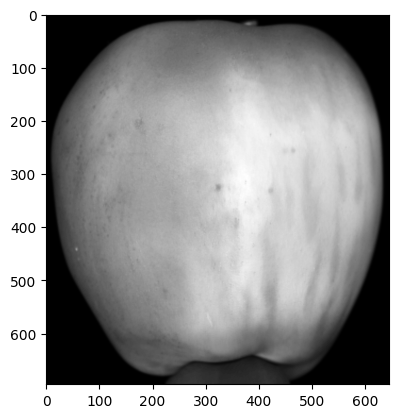

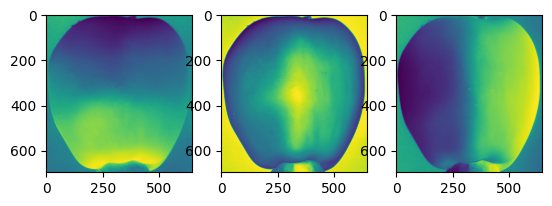

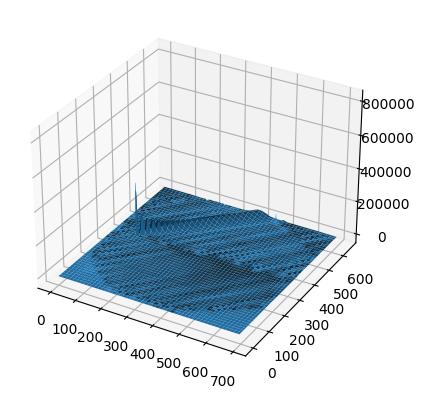

In [35]:
photometric_stereo_apple(image_dir='./images/photometrics_images/Apple/', path_type='average')

*Write your answers here*

# X Individual Contribution Report *(Mandatory)*

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.


Name: Ekin Fergan

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name: Camille Niessink

Contribution on research: 25% \
Contribution on programming: 35% \
Contribution on writing: 40%

Name: Leon Peric

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name: Despoina Touska

Contribution on research: \
Contribution on programming: \
Contribution on writing: 

# -End of Notebook-